In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print("The shape of the dataset is :",df.shape)

The shape of the dataset is : (303, 14)


In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
cat_cols = ["sex","ca","cp","fbs","exang","restecg","slope","thal"]
con_cols =["age","trestbps","chol","thalach","oldpeak"]
target_col = ["target"]

print("the categorial cols are: ",cat_cols)
print("the continuous cols are: ",con_cols)
print("The targget variable is:",target_col)

the categorial cols are:  ['sex', 'ca', 'cp', 'fbs', 'exang', 'restecg', 'slope', 'thal']
the continuous cols are:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
The targget variable is: ['target']


In [6]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

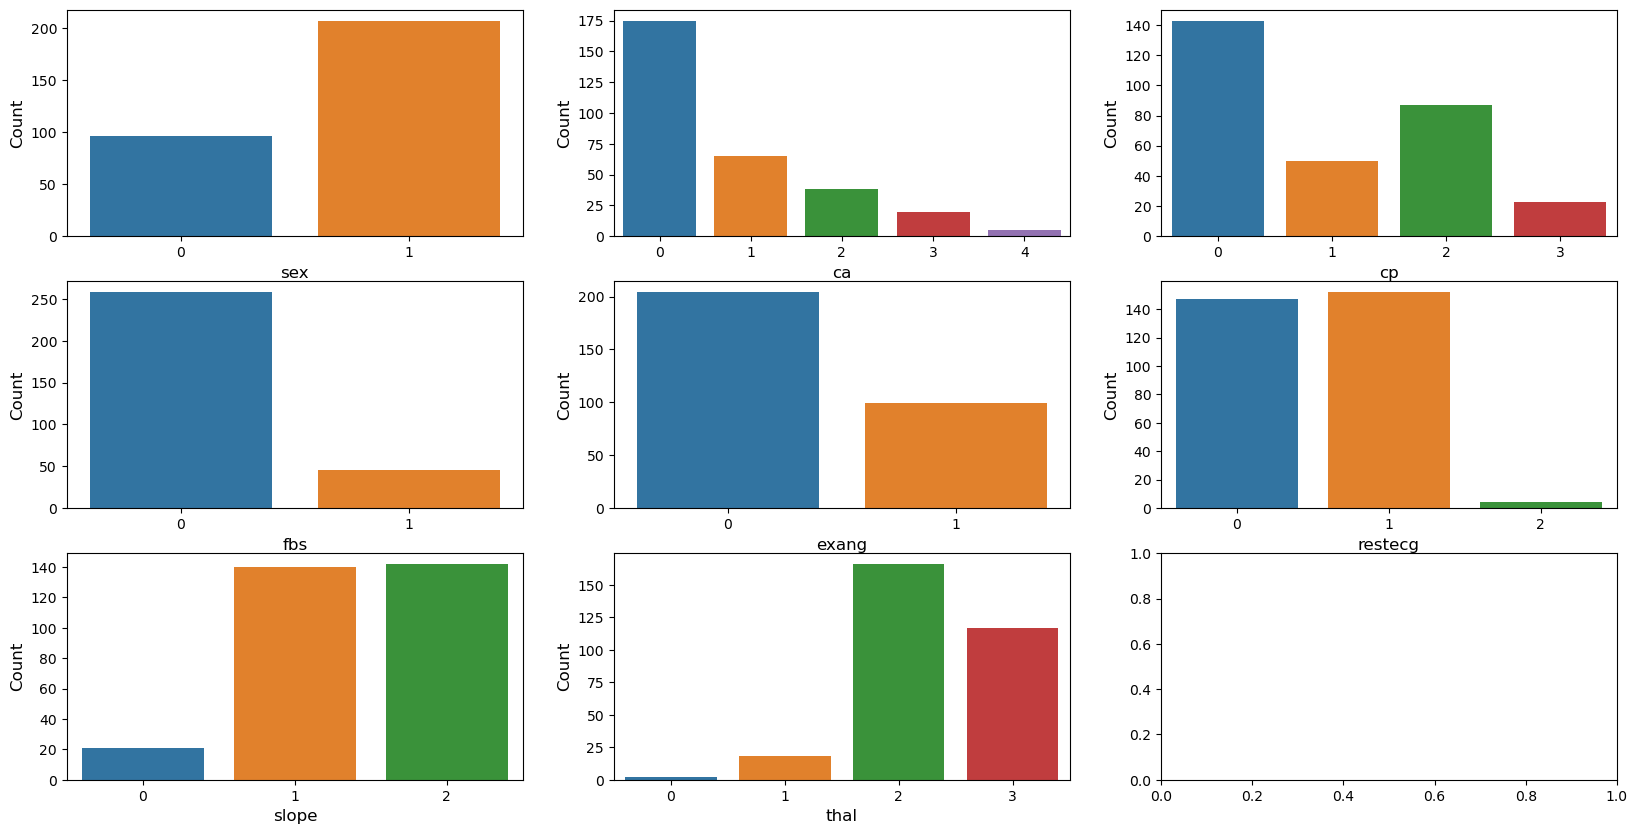

In [8]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(20,10))

for i, feature in enumerate(cat_cols,1):
    plt.subplot(3,3,i)
    sns.countplot(x=feature, data=df)
    plt.ylabel('Count',fontsize=12)
    plt.xlabel(feature, fontsize=12)

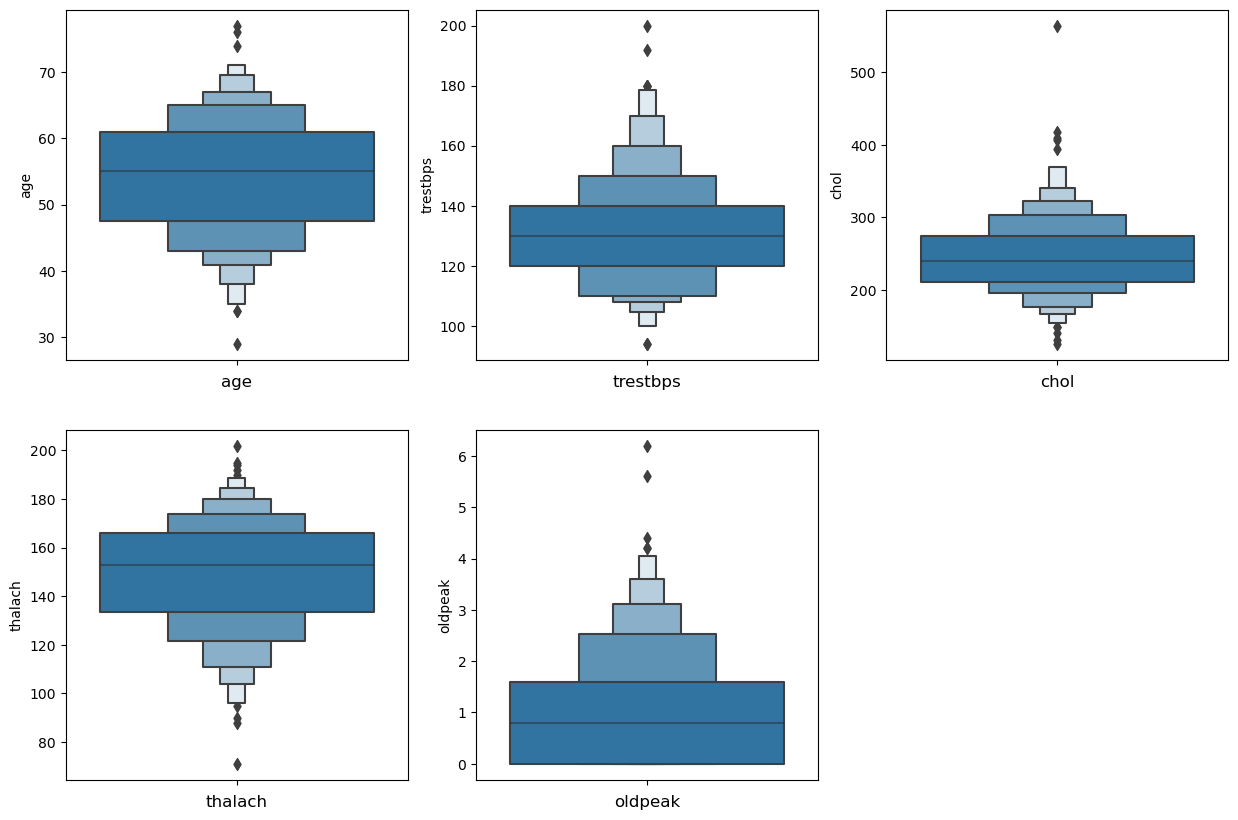

In [9]:
fig , axs =plt.subplots(ncols=2,nrows=3,figsize=(15,10))

for i, feature in enumerate(con_cols, 1):
    plt.subplot(2,3,i)
    sns.boxenplot(y=feature,data=df)
    plt.xlabel(feature,fontsize=12)

<AxesSubplot:xlabel='target', ylabel='count'>

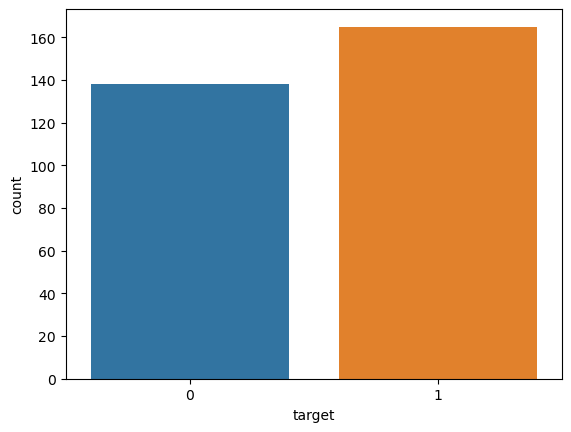

In [10]:
sns.countplot(x="target",data=df)

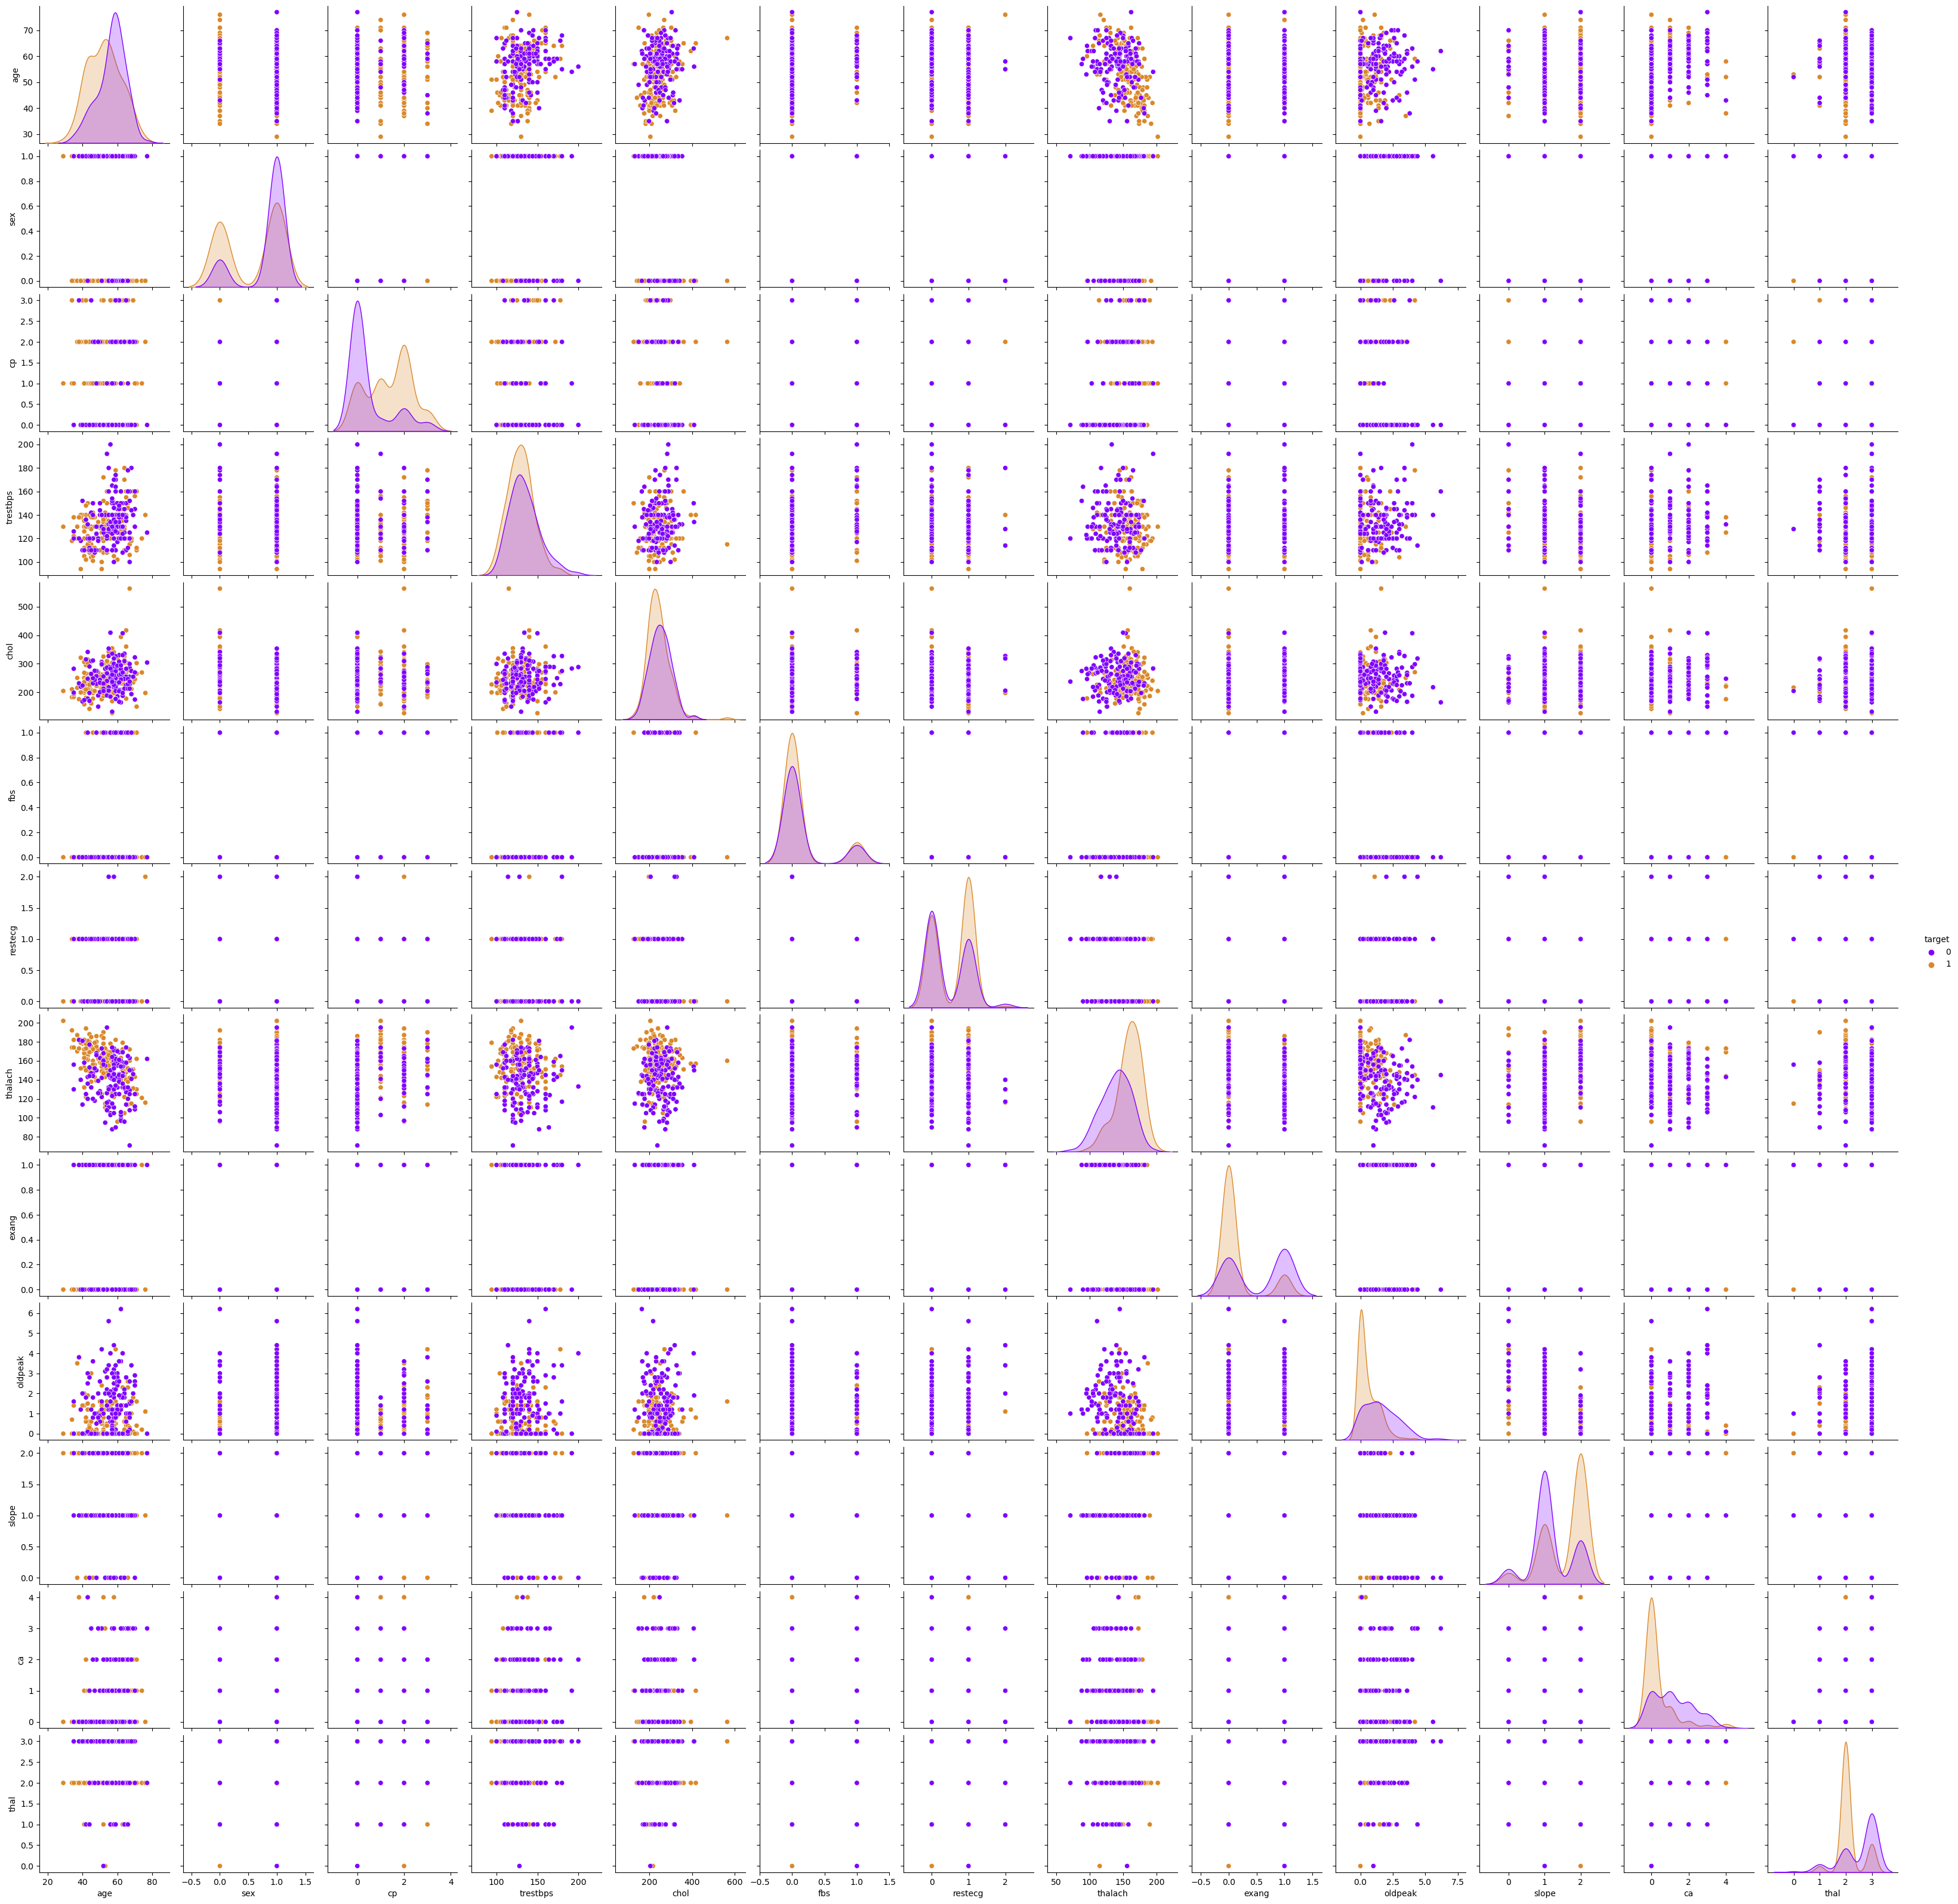

In [11]:
sns.pairplot(df, hue='target', palette =["#8000ff","#da8829"])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix

df1 = df

cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
con_cols = ['age','trestbps','chol','thalach','oldpeak']

df1 = pd.get_dummies(df1,columns = cat_cols,drop_first =True)

X = df1.drop(['target'],axis=1)
y = df1[['target']]

In [20]:
X

,age,trestbps,chol,thalach,oldpeak,sex_1,exang_1,ca_1,ca_2,ca_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
299,45,110,264,132,1.2,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
300,68,144,193,141,3.4,1,0,0,1,0,...,0,0,1,1,0,1,0,0,0,1
301,57,130,131,115,1.2,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 22)
(61, 22)
(242, 1)
(61, 1)


In [22]:
logreg = LogisticRegression(penalty='none', C=0.00001,max_iter=10)

logreg.fit(X_train,y_train)

y_pred_proba = logreg.predict_proba(X_test)

y_pred = np.argmax(y_pred_proba,axis=1)

print("The train accuracy score of Logistic Regression is {:.2f}".format(accuracy_score(y_train, logreg.predict(X_train))))
print("The test accuracy score of Logistic Regression is {:.2f}".format(accuracy_score(y_test, y_pred)))


The train accuracy score of Logistic Regression is 0.63
The test accuracy score of Logistic Regression is 0.74


In [25]:
y_pred_proba

array([[0.77164278, 0.22835722],
       [0.55093683, 0.44906317],
       [0.16842525, 0.83157475],
       [0.68690538, 0.31309462],
       [0.5583339 , 0.4416661 ],
       [0.20745207, 0.79254793],
       [0.3850534 , 0.6149466 ],
       [0.79265649, 0.20734351],
       [0.68322909, 0.31677091],
       [0.41424313, 0.58575687],
       [0.3669673 , 0.6330327 ],
       [0.64759865, 0.35240135],
       [0.33820243, 0.66179757],
       [0.42597457, 0.57402543],
       [0.14667558, 0.85332442],
       [0.20695123, 0.79304877],
       [0.09378405, 0.90621595],
       [0.5401922 , 0.4598078 ],
       [0.72477521, 0.27522479],
       [0.49513446, 0.50486554],
       [0.49113835, 0.50886165],
       [0.77825959, 0.22174041],
       [0.86637425, 0.13362575],
       [0.55206686, 0.44793314],
       [0.3374314 , 0.6625686 ],
       [0.20794074, 0.79205926],
       [0.72387867, 0.27612133],
       [0.22053183, 0.77946817],
       [0.76001785, 0.23998215],
       [0.28340647, 0.71659353],
       [0.

In [23]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

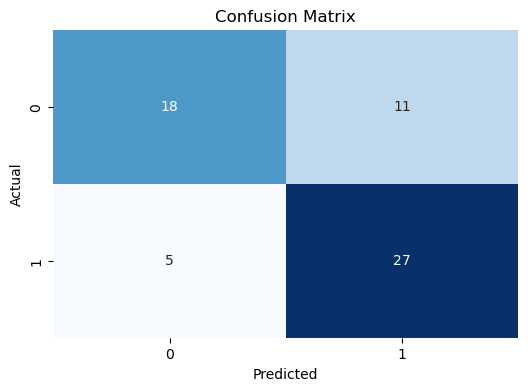

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import log_loss
y_pred_proba_train = logreg.predict_proba(X_train)
loss = log_loss(y_train, y_pred_proba_train)
print(loss)

0.6125210433205961
